In [186]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/loan-testing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               3543 non-null   int64
 1   Dependents        3543 non-null   int64
 2   Education         3543 non-null   int64
 3   Income            3543 non-null   int64
 4   LoanAmount        3543 non-null   int64
 5   Loan_Amount_Term  3543 non-null   int64
 6   Credit_History    3543 non-null   int64
 7   Property_Area     3543 non-null   int64
 8   Loan_Status       3543 non-null   int64
dtypes: int64(9)
memory usage: 249.2 KB


In [187]:
df.describe()

,Age,Dependents,Education,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000
mean,0.889077,0.799605,1.406717,2.412645,2.334462,2.017782,0.668078,1.741744,0.457522
std,0.314081,0.400353,0.491291,0.786086,0.745523,0.817973,0.470970,0.828402,0.498263
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000


In [188]:
df['Loan_Status'].value_counts()

0    1922
1    1621
Name: Loan_Status, dtype: int64

In [189]:
df.head()

,Age,Dependents,Education,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,1,1,1,0
1,1,1,1,3,1,2,1,1,0
2,1,1,1,1,2,3,1,1,0
3,1,1,1,3,3,2,1,1,1
4,1,0,1,3,3,1,1,1,0


In [190]:
df.columns

Index(['Age', 'Dependents', 'Education', 'Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [191]:
# X for column 1 to last column-1, y for last column
from sklearn.model_selection import train_test_split
X=df.drop(columns = 'Loan_Status')
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [192]:
#@title Default title text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=50, scoring='accuracy')
grid_search.fit(X_train, y_train)

# find the best hyperparameters 
for k in param_grid['n_neighbors']:
    print("Hyperparameters for k =", k, ":")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("\n")

Hyperparameters for k = 1 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9867346938775511


Hyperparameters for k = 3 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9867346938775511


Hyperparameters for k = 5 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9867346938775511


Hyperparameters for k = 7 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9867346938775511


Hyperparameters for k = 9 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9867346938775511




In [193]:
## Using piepline to implement k-nn classifier ##
#--------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
steps = [('scaler', StandardScaler()),
('knn', KNeighborsClassifier(n_neighbors = 1))]
knn_pipelineK = Pipeline(steps)
knn_pipelineK.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [194]:
##k-nn classifier for Training data ##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ypred_train = knn_pipelineK.predict(X_train)
matT_clf = confusion_matrix(y_train, ypred_train)
reportT_clf = classification_report(y_train, ypred_train)
print(matT_clf)
print(reportT_clf)
ypred_trainP = knn_pipelineK.predict_proba(X_train)
aucT = roc_auc_score(y_train, ypred_trainP[:,1])
print(aucT)

[[1359    0]
 [   0 1121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

1.0


In [195]:
## k-nn classifier for Testing data ##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ypred_test = knn_pipelineK.predict(X_test)
matS_clf = confusion_matrix(y_test, ypred_test)
reportS_clf = classification_report(y_test, ypred_test)
print(matS_clf)
print(reportS_clf)
ypred_testP = knn_pipelineK.predict_proba(X_test)
aucS = roc_auc_score(y_test, ypred_testP[:,1])
print(aucS)

[[555   8]
 [  4 496]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       563
           1       0.98      0.99      0.99       500

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063

0.9888952042628774


In [196]:
### For KNN Result ###
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
recallT= recall_score(y_train, ypred_train)
precisionT= precision_score(y_train, ypred_train)

recallS= recall_score(y_test, ypred_test)
precisionS= precision_score(y_test, ypred_test)
KNN = pd.DataFrame({'KNN Precision': [precisionT, precisionS],
                       'KNN Recall': [recallT, recallS],
                       'KNN Accuracy': [aucT, aucS]})
KNN.index= ['Training', 'Testing']
KNN

,KNN Precision,KNN Recall,KNN Accuracy
Training,1.000000,1.000,1.000000
Testing,0.984127,0.992,0.988895


In [197]:
## Using piepline to implement Logistic regression ##
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),
('logReg', LogisticRegression())]
clf_pipelineL = Pipeline(steps)
clf_pipelineL.fit(X_train, y_train)
#--------------------------------------------------
## Logistic regression for Training data##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
lopred_train = clf_pipelineL.predict(X_train)
matT_clf = confusion_matrix(y_train, lopred_train)
reportT_clf = classification_report(y_train, lopred_train)
lopred_trainP = clf_pipelineL.predict_proba(X_train)
aucT = roc_auc_score(y_train, lopred_trainP[:,1])
print(matT_clf)
print(reportT_clf)
print(aucT)

[[1359    0]
 [   0 1121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

0.9999999999999999


In [198]:
## Logistic regression for Testing data##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
lopred_test = clf_pipelineL.predict(X_test)
matS_clf = confusion_matrix(y_test, lopred_test)
reportS_clf = classification_report(y_test, lopred_test)
lopred_testP = clf_pipelineL.predict_proba(X_test)
aucS = roc_auc_score(y_test, lopred_testP[:,1])
print(matS_clf)
print(reportS_clf)
print(aucS)

[[563   0]
 [  0 500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1063
   macro avg       1.00      1.00      1.00      1063
weighted avg       1.00      1.00      1.00      1063

1.0


In [199]:
### For Logistic Regression Result ###
recallT= recall_score(y_train, ypred_train)
precisionT= precision_score(y_train, ypred_train)

recallS= recall_score(y_test, ypred_test)
precisionS= precision_score(y_test, ypred_test)
Logistic = pd.DataFrame({'Logistic Precision': [precisionT, precisionS],
                       'Logistic Recall': [recallT, recallS],
                       'Logistic Accuracy': [aucT, aucS]})
Logistic.index= ['Training', 'Testing']
Logistic

,Logistic Precision,Logistic Recall,Logistic Accuracy
Training,1.000000,1.000,1.0
Testing,0.984127,0.992,1.0


In [200]:
## Linear Kernel  ---------------
from sklearn.svm import SVC
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'linear',
                     class_weight='balanced', probability=True))]

svcK_pipeline = Pipeline(steps)
svcK_pipeline.fit(X_train, y_train)
#--------------------------------------------------
## Linear Kernel for Training data
svcKypred_train = svcK_pipeline.predict(X_train)
svcKmat_clf = confusion_matrix(y_train, svcKypred_train)
svcKreport_clf = classification_report(y_train, svcKypred_train)
svcKpred_trainP = svcK_pipeline.predict_proba(X_train)
aucT = roc_auc_score(y_train, svcKpred_trainP[:,1])
print(svcKmat_clf)
print(svcKreport_clf)
print(aucT)

[[1359    0]
 [   0 1121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

1.0


In [201]:
## Linear Kernel for Testing data
svcKypred_test = svcK_pipeline.predict(X_test)
svcKmat_clf = confusion_matrix(y_test, svcKypred_test)
svcKreport_clf = classification_report(y_test, svcKypred_test)
svcKpred_testP = svcK_pipeline.predict_proba(X_test)
aucS = roc_auc_score(y_test, svcKpred_testP[:,1])
print(svcKmat_clf)
print(svcKreport_clf)
print(aucS)

[[563   0]
 [  0 500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1063
   macro avg       1.00      1.00      1.00      1063
weighted avg       1.00      1.00      1.00      1063

1.0


In [202]:
### For Linear Kernel Result ###
recallT= recall_score(y_train, svcKypred_train)
precisionT= precision_score(y_train, svcKypred_train)

recallS= recall_score(y_test, svcKypred_test)
precisionS= precision_score(y_test, svcKypred_test)
LiKernel = pd.DataFrame({'LiKernel Precision': [precisionT, precisionS],
                       'LiKernel Recall': [recallT, recallS],
                       'LiKernel Accuracy': [aucT, aucS]})
LiKernel.index= ['Training', 'Testing']
LiKernel

,LiKernel Precision,LiKernel Recall,LiKernel Accuracy
Training,1.0,1.0,1.0
Testing,1.0,1.0,1.0


In [203]:
## Poly Kernel  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'poly', degree= 3,
                     class_weight='balanced', probability=True))]

svcP_pipeline = Pipeline(steps)
svcP_pipeline.fit(X_train, y_train)
#--------------------------------------------------
## Poly Kernel for Training dat
svcPypred_train = svcP_pipeline.predict(X_train)
svcPmat_clf = confusion_matrix(y_train, svcPypred_train)
svcPreport_clf = classification_report(y_train, svcPypred_train)
svcP_trainP = svcP_pipeline.predict_proba(X_train)
aucT = roc_auc_score(y_train, svcP_trainP[:,1])
print(svcPmat_clf)
print(svcPreport_clf)
print(aucT)

[[1359    0]
 [   0 1121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

1.0


In [204]:
## Poly Kernel for Testing data
svcPypred_test = svcP_pipeline.predict(X_test)
svcPmat_clf = confusion_matrix(y_test, svcPypred_test)
svcPreport_clf = classification_report(y_test, svcPypred_test)
svcPpred_testP = svcP_pipeline.predict_proba(X_test)
aucS = roc_auc_score(y_test, svcPpred_testP[:,1])
print(svcPmat_clf)
print(svcPreport_clf)
print(aucS)

[[563   0]
 [  0 500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1063
   macro avg       1.00      1.00      1.00      1063
weighted avg       1.00      1.00      1.00      1063

1.0


In [205]:
recallT= recall_score(y_train, svcPypred_train)
precisionT= precision_score(y_train, svcPypred_train)

recallS= recall_score(y_test, svcPypred_test)
precisionS= precision_score(y_test, svcPypred_test)
PoKernel = pd.DataFrame({'PoKernel Precision': [precisionT, precisionS],
                       'PoKernel Recall': [recallT, recallS],
                       'PoKernel Accuracy': [aucT, aucS]})
PoKernel.index= ['Training', 'Testing']
PoKernel

,PoKernel Precision,PoKernel Recall,PoKernel Accuracy
Training,1.0,1.0,1.0
Testing,1.0,1.0,1.0


In [206]:
## Gaussian  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'rbf', gamma= 'scale',
                     class_weight='balanced'))]

svcG_pipeline = Pipeline(steps)
svcG_pipeline.fit(X_train, y_train)
#--------------------------------------------------
## Gaussian for Training data
svcGypred_train = svcG_pipeline.predict(X_train)
svcGmat_clf = confusion_matrix(y_train, svcGypred_train)
svcGreport_clf = classification_report(y_train, svcGypred_train)
svcG_trainP = svcP_pipeline.predict_proba(X_train)
aucT = roc_auc_score(y_train, svcG_trainP[:,1])
print(svcGmat_clf)
print(svcGreport_clf)
print(aucT)

[[1359    0]
 [   0 1121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1121

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

1.0


In [207]:
## Gaussian for Testing data
svcGypred_test = svcG_pipeline.predict(X_test)
svcGmat_clf = confusion_matrix(y_test, svcGypred_test)
svcGreport_clf = classification_report(y_test, svcGypred_test)
svcG_trainP = svcP_pipeline.predict_proba(X_train)
astype_td64_unit_conversion = roc_auc_score(y_train, svcG_trainP[:,1])
print(svcGmat_clf)
print(svcGreport_clf)
print(aucS)

[[563   0]
 [  0 500]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1063
   macro avg       1.00      1.00      1.00      1063
weighted avg       1.00      1.00      1.00      1063

1.0


In [208]:
recallT= recall_score(y_train, svcGypred_train)
precisionT= precision_score(y_train, svcGypred_train)

recallS= recall_score(y_test, svcGypred_test)
precisionS= precision_score(y_test, svcGypred_test)
PoKernel = pd.DataFrame({'PoKernel Precision': [precisionT, precisionS],
                       'PoKernel Recall': [recallT, recallS],
                       'PoKernel Accuracy': [aucT, aucS]})
PoKernel.index= ['Training', 'Testing']
PoKernel

,PoKernel Precision,PoKernel Recall,PoKernel Accuracy
Training,1.0,1.0,1.0
Testing,1.0,1.0,1.0


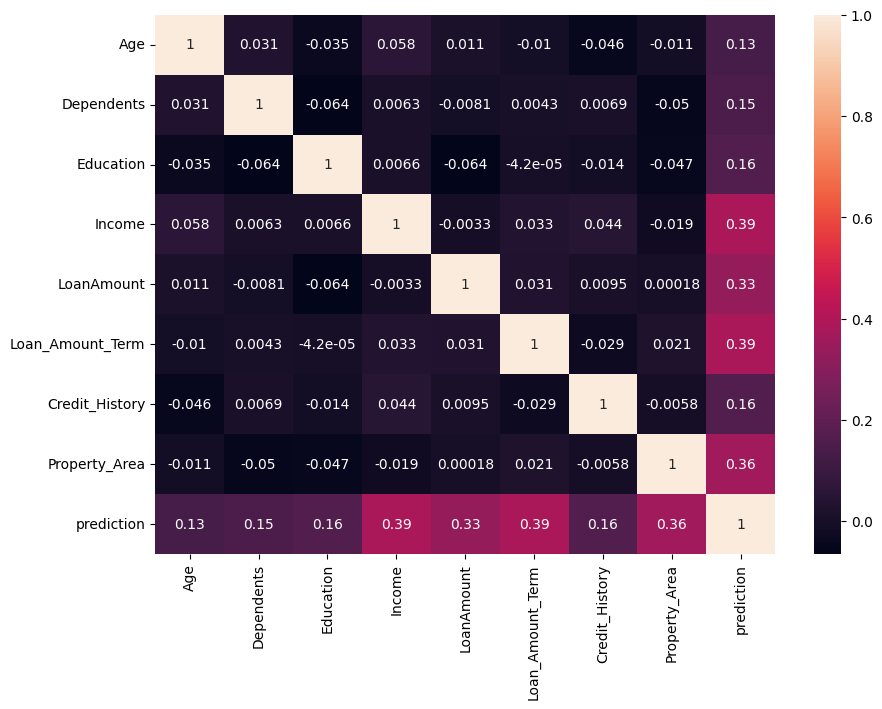

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
result = pd.DataFrame(X_test)
result['prediction'] = lopred_test
corr = result.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);